# K-Mean Clustering

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

# 1. Read and understand the data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
retail_df = pd.read_csv("Online_Retail.csv")
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom


In [3]:
# Basic of df
retail_df.shape

(541909, 8)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 2. Handle the missing value

In [5]:
#Checking missing value

round(100*retail_df.isnull().sum()/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# drop all rows having missing value

retail_df= retail_df.dropna()
retail_df.shape

(406829, 8)

In [8]:
retail_df.duplicated().sum()

5225

In [9]:
retail_df[retail_df.duplicated()].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom


In [10]:
# new Column: Amount
retail_df["Amount"] = retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


# 3. Prepare the data for modelling

### RFM Analysis
- R ( Recency) - Number of days since last purchase 
- F (Frequency) - Number of transactions
- M (Monetary)  - Total revenue contributed by the customer


### cust_id, Recency, Frequency, Monetary

In [11]:
# Monetary
Monetary = retail_df.groupby("CustomerID")["Amount"].sum()
Monetary = Monetary.reset_index()
Monetary.head()


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
# Frequency
Frequency = retail_df.groupby("CustomerID")["InvoiceNo"].count()
Frequency = Frequency.reset_index()
Frequency.columns = ["CustomerID","frequency"]
Frequency.head()



,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
# merge the two df

grouped_df= pd.merge(Monetary,Frequency,on = "CustomerID", how = "inner" )
grouped_df.head()

,CustomerID,Amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
# Recency
# InvoiceDate convert to datetime
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"],format=
                                         "%d-%m-%Y %H:%M")


In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [16]:
# compute the Max date
Max_date = max(retail_df["InvoiceDate"])
Max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
# create column 'diff' basically the difference between max date and actul invoice date

retail_df["diff"] = Max_date - retail_df["InvoiceDate"]
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00


In [18]:
# Finally we can create the Recency column
recency = retail_df.groupby("CustomerID")["diff"].min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [19]:
df= pd.merge(grouped_df,recency,on = "CustomerID", how = "inner" )
df.columns = ['CustomerID', 'Amount', 'Frequency','Recency']
df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [20]:
# convert Recency into days 
import  datetime as dt
df["Recency"] = df["Recency"].dt.days
df.head()


,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [21]:
df.shape

(4372, 4)

# Now, more data preparation

## 1. Outliers Treatment
## 2. Rescalling


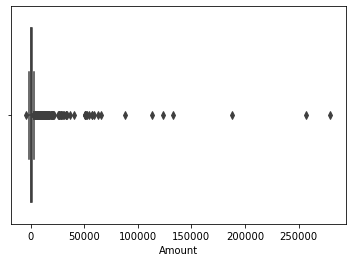

In [22]:
# Outliers
sns.boxplot(df.Amount)
plt.show()


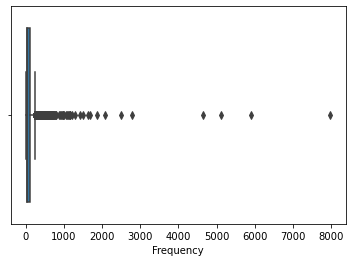

In [23]:
sns.boxplot(df.Frequency)
plt.show()


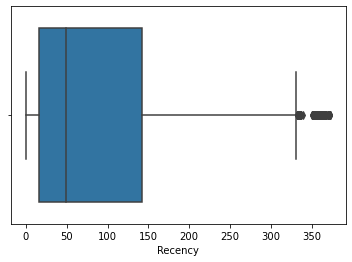

In [24]:
sns.boxplot(df.Recency)
plt.show()

# Removing outliers

In [25]:
df.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency'], dtype='object')

In [26]:
# removing (statistical) outliers

# outlier treatment for amount
Q1 = df.Amount.quantile(0.05)
Q3 = df.Amount.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Amount >= Q1 - 1.5*IQR) & (df.Amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = df.Recency.quantile(0.05)
Q3 = df.Recency.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Recency >= Q1 - 1.5*IQR) & (df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = df.Frequency.quantile(0.05)
Q3 = df.Frequency.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Frequency >= Q1 - 1.5*IQR) & (df.Frequency <= Q3 + 1.5*IQR)]



<AxesSubplot:xlabel='Amount'>

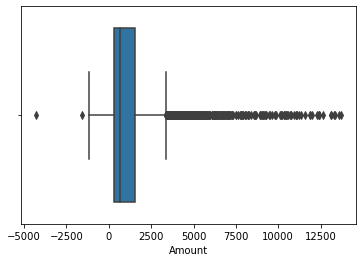

In [27]:
sns.boxplot(df.Amount)

<AxesSubplot:xlabel='Recency'>

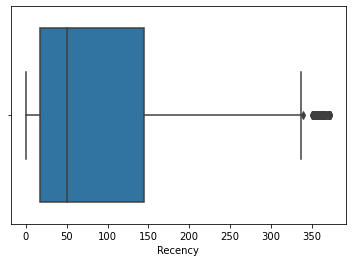

In [28]:
sns.boxplot(df.Recency)

<AxesSubplot:xlabel='Frequency'>

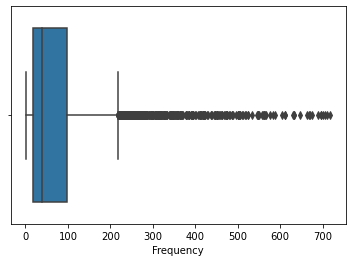

In [29]:
sns.boxplot(df.Frequency)

In [30]:
# Rescalling
rfm_df = df[["Amount","Frequency","Recency"]]
rfm_df.head()

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit-transform

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = rfm_df.columns
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [32]:
rfm_df_scaled.shape

(4293, 3)

# 4. Modelling

In [33]:
# import important library
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [34]:
kmeans.labels_

array([1, 3, 0, ..., 1, 0, 0])

# Finding the optimal number of clusters

##  Method - 1

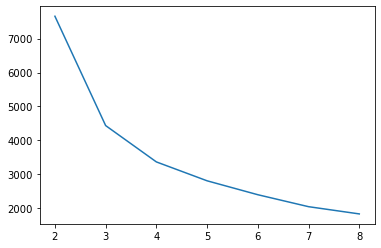

In [35]:
# elbow curve/ SSD(Sum of Square distances)
ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
#plot the ssd for each n_cluster
plt.plot(ssd)
plt.xticks([0,1,2,3,4,5,6],[2,3,4,5,6,7,8])
plt.show()

##  Method - 2

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [36]:
# Silhouette Score
# Import libary

from sklearn.metrics import silhouette_score

In [37]:
range_n_cluster=[2,3,4,5,6,7,8]

for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(rfm_df_scaled,cluster_labels)
    print("for n_clusters = {0},the Silhouette Score is {1}".format(num_clusters,silhouette_avg))
     

for n_clusters = 2,the Silhouette Score is 0.5415858652525395
for n_clusters = 3,the Silhouette Score is 0.5084896296141937
for n_clusters = 4,the Silhouette Score is 0.48148099614734263
for n_clusters = 5,the Silhouette Score is 0.46605807987643605
for n_clusters = 6,the Silhouette Score is 0.4169435507116489
for n_clusters = 7,the Silhouette Score is 0.41738859880283424
for n_clusters = 8,the Silhouette Score is 0.4094529088695968


In [38]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [39]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [40]:
# Assign the labels
df["Cluster_id"] = kmeans.labels_
df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


In [41]:
df.Cluster_id.value_counts()

1    2726
2    1068
0     499
Name: Cluster_id, dtype: int64

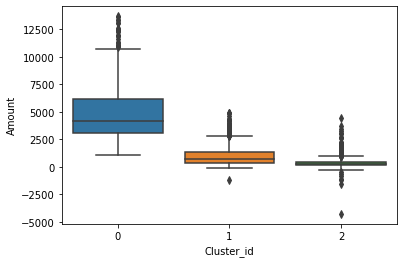

In [42]:
#plot
sns.boxplot(x="Cluster_id",y='Amount',data=df)
plt.show()

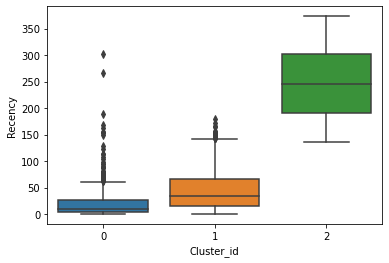

In [43]:
sns.boxplot(x="Cluster_id",y='Recency',data=df)
plt.show()

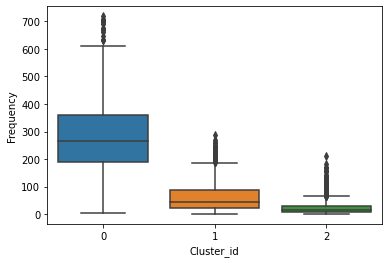

In [44]:
sns.boxplot(x="Cluster_id",y='Frequency',data=df)
plt.show()